# Vaccine Usage Prediction

#### Abstract:  
Subjects receiving the same vaccine often show different levels of immune responses and some may even present adverse side effects to the vaccine. Systems vaccinology can combine data and machine learning techniques to obtain highly predictive signatures of vaccine immunogenicity and reactogenicity. Currently, several machine learning methods are already available to researchers with no background in bioinformatics.


#### Problem Statement:  
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.

#### Scope:  
●	Exploratory data analysis  
●	Data Pre-processing  
●	Training logistic regression model with MLE for prediction  
●	Tuning the model to improve the performance  


#### Learning Outcome:  
The students will get a better understanding of how the variables are linked to each other and how the EDA approach will help them gain more insights and knowledge about the data that we have and train Logistic Regression using MLE.


In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

In [2]:
df = pd.read_csv(r"D:\h1n1_vaccine_prediction.csv", header=0)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
# We drop the "unique_id" column as it is the index of the dataset.
df.drop("unique_id", axis=1, inplace=True)

### Basic Data Exploration.

In [4]:
print("The shape of the data:", df.shape)
df.dtypes

The shape of the data: (26707, 33)


h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [5]:
print("Descriptive summary:")
df.describe(include="all")

Descriptive summary:


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [7]:
# Checking column names

df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

Checking for singularity and high-cardinality.

In [8]:
for col in df.columns:
    print(col, ":\n", df[col].value_counts(), ":\n")  

h1n1_worry :
 2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64 :

h1n1_awareness :
 1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64 :

antiviral_medication :
 0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64 :

contact_avoidance :
 1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64 :

bought_face_mask :
 0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64 :

wash_hands_frequently :
 1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64 :

avoid_large_gatherings :
 0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64 :

reduced_outside_home_cont :
 0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64 :

avoid_touch_face :
 1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64 :

dr_recc_h1n1_vacc :
 0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64 :

dr_recc_seasonal_vacc :
 0.0    16453
1.0     8094
Name: dr_recc_

* We see that we have 26707 rows and 34 features
* We have 9 categorical fields, 24 discrete numeric fields and 1 target variable in our data.

### Pre-processing the data

In [9]:
# Create a copy of the dataframe.
data = pd.DataFrame.copy(df)

In [10]:
# Checking for duplicated values present in the data.
data.duplicated().sum()

4

In [11]:
# Dropping the duplicate values.
data.drop_duplicates(inplace=True)

In [12]:
# Checking the shape of the data again.
data.shape

(26703, 33)

#### Checking missing values present in the data

In [13]:
data.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12272
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [14]:
# Replacing the missing values with their respective mode values
for value in data.columns:
    data[value].fillna(data[value].mode()[0], inplace = True)

# Checking value is filled or not.
data.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

## Converting the categorical data into numerical data.
1. We need to convert the categorical features to hold numeric values.
2. We also need to convert the discrete numeric float values to integer.

In [15]:
colname = []
for x in data.columns:
    if data[x].dtype == 'object':
        colname.append(x)
colname

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [16]:
#from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    data[x] = le.fit_transform(data[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x, ":")
    print('mapping', le_name_mapping)

Feature age_bracket :
mapping {'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years': 3, '65+ Years': 4}
Feature qualification :
mapping {'12 Years': 0, '< 12 Years': 1, 'College Graduate': 2, 'Some College': 3}
Feature race :
mapping {'Black': 0, 'Hispanic': 1, 'Other or Multiple': 2, 'White': 3}
Feature sex :
mapping {'Female': 0, 'Male': 1}
Feature income_level :
mapping {'<= $75,000, Above Poverty': 0, '> $75,000': 1, 'Below Poverty': 2}
Feature marital_status :
mapping {'Married': 0, 'Not Married': 1}
Feature housing_status :
mapping {'Own': 0, 'Rent': 1}
Feature employment :
mapping {'Employed': 0, 'Not in Labor Force': 1, 'Unemployed': 2}
Feature census_msa :
mapping {'MSA, Not Principle  City': 0, 'MSA, Principle City': 1, 'Non-MSA': 2}


In [17]:
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [18]:
data.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int32
qualification                  int32
race                           int32
sex                            int32
income_level                   int32
marital_status                 int32
h

In [19]:
float_colname = []
for x in data.columns:
    if data[x].dtype == 'float64':
        float_colname.append(x)
print(float_colname)

for x in float_colname:
    data[x] = data[x].astype(int)

['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']


In [21]:
# Checking the data type

data.dtypes

h1n1_worry                   int32
h1n1_awareness               int32
antiviral_medication         int32
contact_avoidance            int32
bought_face_mask             int32
wash_hands_frequently        int32
avoid_large_gatherings       int32
reduced_outside_home_cont    int32
avoid_touch_face             int32
dr_recc_h1n1_vacc            int32
dr_recc_seasonal_vacc        int32
chronic_medic_condition      int32
cont_child_undr_6_mnths      int32
is_health_worker             int32
has_health_insur             int32
is_h1n1_vacc_effective       int32
is_h1n1_risky                int32
sick_from_h1n1_vacc          int32
is_seas_vacc_effective       int32
is_seas_risky                int32
sick_from_seas_vacc          int32
age_bracket                  int32
qualification                int32
race                         int32
sex                          int32
income_level                 int32
marital_status               int32
housing_status               int32
employment          

In [22]:
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1,0,0,0,0,0,0,1,1,0,...,3,0,2,1,0,1,2,0,0,0
1,3,2,0,1,0,1,0,1,1,0,...,3,1,2,1,1,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,3,1,0,1,0,0,0,2,0,0
3,1,1,0,1,0,1,1,0,0,0,...,3,0,2,1,1,1,1,0,0,0
4,2,1,0,1,0,1,1,0,1,0,...,3,0,0,0,0,0,0,1,0,0


### Splitting data into X(Independent) and Y(Dependent) variables

In [24]:
X = data.values[:, 0:-1]
Y = data.values[:,-1]

# We confirm the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (26703, 32)
Shape of Y: (26703,)


We do not need to scale/tranform our data as we have all discrete numeric values with a low range.

### Running a basic model

In [26]:
# Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [27]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (18692, 32)
Shape of Y_train: (18692,)
Shape of X_test: (8011, 32)
Shape of Y_test: (8011,)


In [28]:
#from sklearn.linear_model import LogisticRegression

# Create a model
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

# Predicting using .predict
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 1]


#### Checking the intercept and slope coefficients of our features

In [30]:
print("Slope coef: ", classifier.intercept_)

temp = list(zip(data.columns[:-1], classifier.coef_.ravel()))
temp_df = pd.DataFrame(temp, columns = ['Features', 'Coefficients'])
temp_df.style.hide_index()

Slope coef:  [-6.54927662]


Features,Coefficients
h1n1_worry,-0.107985
h1n1_awareness,0.151061
antiviral_medication,0.185388
contact_avoidance,-0.048926
bought_face_mask,0.209541
wash_hands_frequently,-0.017641
avoid_large_gatherings,-0.229908
reduced_outside_home_cont,0.019974
avoid_touch_face,0.062300
dr_recc_h1n1_vacc,1.979409


#### Finding accuracy and metrics

In [33]:
#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, Y_pred)) 
print("Accuracy of the model:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[5976  297]
 [1036  702]]
Accuracy of the model: 0.8336037947821745
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6273
           1       0.70      0.40      0.51      1738

    accuracy                           0.83      8011
   macro avg       0.78      0.68      0.71      8011
weighted avg       0.82      0.83      0.82      8011



In [34]:
# Predicting using .predict_proba and storing the predicted probabilities

y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.91928404 0.08071596]
 [0.78131518 0.21868482]
 [0.89926526 0.10073474]
 ...
 [0.91180718 0.08819282]
 [0.98494151 0.01505849]
 [0.47400249 0.52599751]]


### Adjusting the threshold

In [35]:
# printing type I and type II errors for every threshold in range (0.4-0.6)

least_error = []
type_1 = []
type_2 = []

for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm = confusion_matrix(Y_test, predict_mine)
    total_err = cfm[0,1]+cfm[1,0]
    type_1.append(cfm[0,1])
    type_2.append(cfm[1,0])
    least_error.append(total_err)
    print("Errors at threshold ", a, ":", total_err, " , type 2 error:", cfm[1,0]," , type 1 error :", cfm[0,1])

Errors at threshold  0.4 : 1347  , type 2 error: 848  , type 1 error : 499
Errors at threshold  0.41000000000000003 : 1341  , type 2 error: 863  , type 1 error : 478
Errors at threshold  0.42000000000000004 : 1346  , type 2 error: 888  , type 1 error : 458
Errors at threshold  0.43000000000000005 : 1335  , type 2 error: 908  , type 1 error : 427
Errors at threshold  0.44000000000000006 : 1322  , type 2 error: 920  , type 1 error : 402
Errors at threshold  0.45000000000000007 : 1319  , type 2 error: 940  , type 1 error : 379
Errors at threshold  0.4600000000000001 : 1323  , type 2 error: 965  , type 1 error : 358
Errors at threshold  0.4700000000000001 : 1325  , type 2 error: 986  , type 1 error : 339
Errors at threshold  0.4800000000000001 : 1327  , type 2 error: 1004  , type 1 error : 323
Errors at threshold  0.4900000000000001 : 1325  , type 2 error: 1015  , type 1 error : 310
Errors at threshold  0.5000000000000001 : 1333  , type 2 error: 1036  , type 1 error : 297
Errors at thresho

In [36]:
# Sorting our errors in ascending order
least_error.sort()
type_2.sort()
type_1.sort()

# Displaying errors in ascending order

print("Total errors:", least_error, "\n")
print("Type 2 errors:", type_2, "\n")
print("Type 1 errors:", type_1, "\n")

# Finding least errors

print("Least total error:", min(least_error))
print("Least type 2 error:", min(type_2))
print("Least type 1 error:", min(type_1))

Total errors: [1319, 1322, 1323, 1325, 1325, 1327, 1333, 1335, 1335, 1341, 1344, 1346, 1346, 1346, 1347, 1348, 1351, 1354, 1357, 1358, 1366] 

Type 2 errors: [848, 863, 888, 908, 920, 940, 965, 986, 1004, 1015, 1036, 1049, 1065, 1081, 1093, 1110, 1130, 1148, 1157, 1173, 1190] 

Type 1 errors: [176, 184, 197, 210, 221, 238, 251, 265, 281, 286, 297, 310, 323, 339, 358, 379, 402, 427, 458, 478, 499] 

Least total error: 1319
Least type 2 error: 848
Least type 1 error: 176


* Threshold = 0.47
    * Total error = 1206
    * Type_1 error = 358
    * Type_2 error = 848
* Threshold = 0.48
    * Total error = 1208
    * Type_1 error = 342
    * Type_2 error = 866
* Threshold = 0.49
    * Total error = 1211
    * Type_1 error = 331
    * Type_2 error = 880
* Threshold = 0.51
    * Total error = 1211
    * Type_1 error = 291
    * Type_2 error = 920
* Threshold = 0.50
    * Total error = 1214
    * Type_1 error = 310
    * Type_2 error = 904
* Threshold = 0.46
    * Total error = 1216
    * Type_1 error = 378
    * Type_2 error = 838
* Threshold = 0.42
    * Total error = 1224
    * Type_1 error = 462
    * Type_2 error = 762
    

#### Here we confirm that the threshold 0.47 gives us the least errors

In [38]:
# We consider threshold as 0.47 and predict.

y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.47:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
# print(y_pred_class)

print(confusion_matrix(Y_test, y_pred_class)) 
print("\n Accuracy of the model: ", accuracy_score(Y_test, y_pred_class))
print(classification_report(Y_test, y_pred_class))

[[5934  339]
 [ 986  752]]

 Accuracy of the model:  0.8346024216702035
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6273
           1       0.69      0.43      0.53      1738

    accuracy                           0.83      8011
   macro avg       0.77      0.69      0.72      8011
weighted avg       0.82      0.83      0.82      8011



In [39]:
# # 0.50
# 0.8378089512358049
# 0.86      0.95      0.90
# 0.68      0.42      0.52

# # 0.47
# 0.8388777555110221
# 0.87      0.94      0.90
# 0.67      0.46      0.54

# # 0.42
# 0.8364729458917836
# 0.88      0.92      0.90
# 0.64      0.51      0.57

# # 0.40
# 0.8358049432197728
# 0.88      0.91      0.90
# 0.63      0.54      0.58

In [40]:
#from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

0.8330505076187295


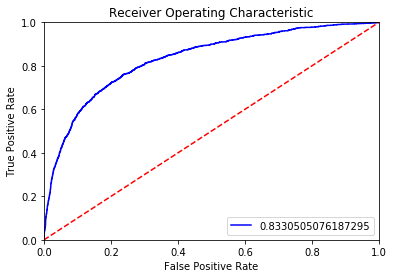

In [42]:
#import matplotlib.pyplot as plt

# Setting title of the plot
plt.title('Receiver Operating Characteristic')

# Plotting the roc curve in blue 
plt.plot(fpr,tpr, 'b', label = auc)

# Setting legend to show at the bottom-right corner.
plt.legend(loc = 'lower right')

# Plotting a line plot with red-dashed line bottom-left to top-right diagonal.
plt.plot([0, 1], [0, 1],'r--')

# Setting limits for X and Y
plt.xlim([0, 1])
plt.ylim([0, 1])

# Setting labels for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [43]:
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print("auc:", auc)
print("fpr:", fpr)
print("tpr:",tpr)

auc: 0.6893200570806222
fpr: [0.         0.05404113 1.        ]
tpr: [0.         0.43268124 1.        ]


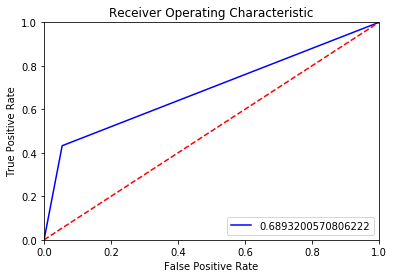

In [44]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### Using cross validation - K-Fold

In [45]:
classifier=LogisticRegression()

# Performing kfold_cross_validation

#from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

# Running the model using scoring metric as accuracy

#from sklearn.model_selection import cross_val_score
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train, y=Y_train, cv=kfold_cv)

print("K-fold cross-validation Scores: \n",kfold_cv_result)  # We get 10 accuracy scores

# Finding the mean
print("\n K-fold cross-validation mean:", kfold_cv_result.mean())  # Avg of all 10 accuracy scores

K-fold cross-validation Scores: 
 [0.8368984  0.82780749 0.83199572 0.82985554 0.84216158 0.83788122
 0.83841627 0.84697699 0.83681113 0.83574104]

 K-fold cross-validation mean: 0.8364545368709282


### Model tuning

In [46]:
for train_value, test_value in kfold_cv.split(X_train,Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)
# print(list(zip(Y_test,Y_pred)))

cfm = confusion_matrix(Y_test, Y_pred)  # Always pass the Y_test(Y_actuals) and then Y_pred.
print("Confusion Matrix: \n\n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n\n", Report)

Confusion Matrix: 

 [[5982  291]
 [1045  693]]

 Accuracy of the model:  0.8332293096991636


 Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.95      0.90      6273
           1       0.70      0.40      0.51      1738

    accuracy                           0.83      8011
   macro avg       0.78      0.68      0.70      8011
weighted avg       0.82      0.83      0.81      8011



### Using cross validation - Stratified K-Fold

In [47]:
classifier=LogisticRegression()

# Performing stratified kfold_cross_validation

#from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)   # n_splits = 10 is k=10
# print(kfold_cv)

# Running the model using scoring metric as accuracy

#from sklearn.model_selection import cross_val_score
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train, y=Y_train, cv=kfold_cv) # X capital , y lower case

print("Stratified K-fold cross-validation Scores: \n",kfold_cv_result)  # We get 10 accuracy scores

# Finding the mean
print("\n Stratified K-fold cross-validation mean:", kfold_cv_result.mean())  # Avg of all 10 accuracy scores

Stratified K-fold cross-validation Scores: 
 [0.83529412 0.83796791 0.84109149 0.83788122 0.83734617 0.8341359
 0.84323167 0.83039058 0.82182986 0.84644195]

 Stratified K-fold cross-validation mean: 0.8365610881737782


In [48]:
for train_value, test_value in kfold_cv.split(X=X_train,y=Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)
# print(list(zip(Y_test,Y_pred)))

cfm = confusion_matrix(Y_test, Y_pred)  # Always pass the Y_test(Y_actuals) and then Y_pred.
print("Confusion Matrix: \n\n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n\n", Report)

Confusion Matrix: 

 [[5981  292]
 [1039  699]]

 Accuracy of the model:  0.8338534515041818


 Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.95      0.90      6273
           1       0.71      0.40      0.51      1738

    accuracy                           0.83      8011
   macro avg       0.78      0.68      0.71      8011
weighted avg       0.82      0.83      0.82      8011



### Using RFE

In [50]:
# Using columns

colname = data.columns

#from sklearn.feature_selection import RFE

rfe = RFE(classifier, n_features_to_select=10)  # Instead of 10, we can also pass percentage (eg> 0.75)
model_rfe = rfe.fit(X_train, Y_train)

print("Num Features: ",model_rfe.n_features_)   # .n_features_ gives number of features
print("\n Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("\n Feature Ranking: ", model_rfe.ranking_)   # .ranking_ gives rankings, '1s' indicate retained cols, '>1' get dropped

Num Features:  10

 Selected Features: 
[('h1n1_worry', False), ('h1n1_awareness', True), ('antiviral_medication', False), ('contact_avoidance', False), ('bought_face_mask', True), ('wash_hands_frequently', False), ('avoid_large_gatherings', True), ('reduced_outside_home_cont', False), ('avoid_touch_face', False), ('dr_recc_h1n1_vacc', True), ('dr_recc_seasonal_vacc', True), ('chronic_medic_condition', False), ('cont_child_undr_6_mnths', False), ('is_health_worker', True), ('has_health_insur', True), ('is_h1n1_vacc_effective', True), ('is_h1n1_risky', True), ('sick_from_h1n1_vacc', False), ('is_seas_vacc_effective', False), ('is_seas_risky', False), ('sick_from_seas_vacc', False), ('age_bracket', False), ('qualification', False), ('race', False), ('sex', False), ('income_level', False), ('marital_status', True), ('housing_status', False), ('employment', False), ('census_msa', False), ('no_of_adults', False), ('no_of_children', False)]

 Feature Ranking:  [ 4  1  6 13  1 20  1 18 12  1 

In [51]:
# Using 90% of columns

rfe = RFE(classifier, n_features_to_select=0.90)
model_rfe = rfe.fit(X_train, Y_train)

print("Num Features: ",model_rfe.n_features_)   # .n_features_ gives number of features
print("\n Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("\n Feature Ranking: ", model_rfe.ranking_)   # .ranking_ gives rankings, '1s' indicate retained cols, '>1' get dropped

Num Features:  28

 Selected Features: 
[('h1n1_worry', True), ('h1n1_awareness', True), ('antiviral_medication', True), ('contact_avoidance', True), ('bought_face_mask', True), ('wash_hands_frequently', False), ('avoid_large_gatherings', True), ('reduced_outside_home_cont', True), ('avoid_touch_face', True), ('dr_recc_h1n1_vacc', True), ('dr_recc_seasonal_vacc', True), ('chronic_medic_condition', True), ('cont_child_undr_6_mnths', True), ('is_health_worker', True), ('has_health_insur', True), ('is_h1n1_vacc_effective', True), ('is_h1n1_risky', True), ('sick_from_h1n1_vacc', False), ('is_seas_vacc_effective', True), ('is_seas_risky', True), ('sick_from_seas_vacc', True), ('age_bracket', True), ('qualification', True), ('race', True), ('sex', True), ('income_level', True), ('marital_status', True), ('housing_status', True), ('employment', False), ('census_msa', True), ('no_of_adults', False), ('no_of_children', True)]

 Feature Ranking:  [1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 

In [52]:
Y_pred=model_rfe.predict(X_test)

cfm = confusion_matrix(Y_test, Y_pred)  # Always pass the Y_test(Y_actuals) and then Y_pred.
print("Confusion Matrix: \n\n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n\n", Report)

Confusion Matrix: 

 [[5972  301]
 [1035  703]]

 Accuracy of the model:  0.8332293096991636


 Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.95      0.90      6273
           1       0.70      0.40      0.51      1738

    accuracy                           0.83      8011
   macro avg       0.78      0.68      0.71      8011
weighted avg       0.82      0.83      0.82      8011



### SFS - Sequential Forward Selection

In [54]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Define Sequential Forward Selection (sfs)

sffs = SFS(LogisticRegression(),
           k_features="best",
           forward=True,
           scoring = 'accuracy',
           cv = 5)   # 5 Fold cross-validation.

# Use SFS to select the top features 

feature_names=data.columns[:-1]
sffs.fit(X_train, Y_train)

# Create a dataframe for the SFS results 

df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)","[0.8026210216635464, 0.8015512169029152, 0.800...",0.80077,"(9,)"
2,"(9, 15)","[0.820272800213961, 0.8186680930730141, 0.8277...",0.822117,"(9, 15)"
3,"(9, 15, 16)","[0.8245520192564857, 0.8280288847285371, 0.827...",0.826824,"(9, 15, 16)"
4,"(9, 13, 15, 16)","[0.8315057502005884, 0.8325755549612196, 0.831...",0.832388,"(9, 13, 15, 16)"
5,"(9, 13, 15, 16, 23)","[0.8309708478202728, 0.8349826156726398, 0.829...",0.832977,"(9, 13, 15, 16, 23)"
6,"(0, 9, 13, 15, 16, 23)","[0.8315057502005884, 0.8349826156726398, 0.831...",0.833779,"(0, 9, 13, 15, 16, 23)"
7,"(0, 1, 9, 13, 15, 16, 23)","[0.8325755549612196, 0.8365873228135865, 0.833...",0.834796,"(0, 1, 9, 13, 15, 16, 23)"
8,"(0, 1, 9, 13, 15, 16, 21, 23)","[0.8333779085316929, 0.8360524204332709, 0.835...",0.835063,"(0, 1, 9, 13, 15, 16, 21, 23)"
9,"(0, 1, 9, 13, 15, 16, 21, 23, 26)","[0.8328430061513774, 0.8352500668627976, 0.834...",0.835812,"(0, 1, 9, 13, 15, 16, 21, 23, 26)"
10,"(0, 1, 9, 12, 13, 15, 16, 21, 23, 26)","[0.8312382990104306, 0.8376571275742177, 0.835...",0.836026,"(0, 1, 9, 12, 13, 15, 16, 21, 23, 26)"


* We see that we get the best average score at index location 19, with a score of 0.834163.
* We will print the feature_names and use it to build a logistic regression model.

In [56]:
temp = list(df_SFFS_results["feature_names"].loc[19])
temp = np.array(temp, dtype=int)
temp

array([ 0,  1,  3,  5,  8,  9, 11, 12, 13, 14, 15, 16, 21, 22, 23, 25, 26,
       29, 30])

In [59]:
X = data.values[:,[0, 1, 2, 4, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 25, 27]]
Y = data.values[:,-1]

In [60]:
X

array([[1, 0, 0, ..., 3, 2, 0],
       [3, 2, 0, ..., 3, 2, 1],
       [1, 1, 0, ..., 3, 0, 0],
       ...,
       [2, 2, 0, ..., 3, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 3, 0, 0]], dtype=int64)

In [61]:
# Split the data inot test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (18692, 19)
Shape of Y_train: (18692,)
Shape of X_test: (8011, 19)
Shape of Y_test: (8011,)


In [62]:
#from sklearn.linear_model import LogisticRegression

# Create a model
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
#print(Y_pred)

cfm = confusion_matrix(Y_test, Y_pred)  # Always pass the Y_test(Y_actuals) and then Y_pred.
print("Confusion Matrix: \n\n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n\n", Report)

Confusion Matrix: 

 [[5948  325]
 [1046  692]]

 Accuracy of the model:  0.828860317064037


 Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.95      0.90      6273
           1       0.68      0.40      0.50      1738

    accuracy                           0.83      8011
   macro avg       0.77      0.67      0.70      8011
weighted avg       0.81      0.83      0.81      8011



#### Feature selection using Univariate Selection

In [65]:
X = data.values[:,:-1]
Y = data.values[:,-1]

#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=29)
fit1 = test.fit(X, Y)

colname=data.columns

print(fit1.scores_, "\n\n")
print(list(zip(colname,fit1.get_support())), "\n\n")
X = fit1.transform(X)

# Split the data inot test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

# Create a model
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

cfm = confusion_matrix(Y_test, Y_pred)  # Always pass the Y_test(Y_actuals) and then Y_pred.
print("\n Confusion Matrix: \n\n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n\n", Report)

[2.01406372e+02 1.11936145e+02 4.10692273e+01 1.59843775e+01
 1.23196866e+02 2.58835069e+01 5.57826066e+00 8.59730991e+00
 4.31352591e+01 3.30679039e+03 8.91983716e+02 1.72692568e+02
 1.09255742e+02 6.72114260e+02 3.04957871e+00 4.95782149e+02
 1.91415410e+03 1.15686446e+02 2.43376588e+02 1.22224444e+03
 2.00723824e+00 4.37495286e+01 2.01696195e+01 1.49586913e+01
 6.79268642e+00 1.29280785e+01 3.06009263e+01 1.99893762e+01
 2.50533954e+00 3.28522226e-03 9.04127980e-01 2.75783339e-01] 


[('h1n1_worry', True), ('h1n1_awareness', True), ('antiviral_medication', True), ('contact_avoidance', True), ('bought_face_mask', True), ('wash_hands_frequently', True), ('avoid_large_gatherings', True), ('reduced_outside_home_cont', True), ('avoid_touch_face', True), ('dr_recc_h1n1_vacc', True), ('dr_recc_seasonal_vacc', True), ('chronic_medic_condition', True), ('cont_child_undr_6_mnths', True), ('is_health_worker', True), ('has_health_insur', True), ('is_h1n1_vacc_effective', True), ('is_h1n1_risky'

<head>
	<title>Metrics Summary</title> 
	<style>
		table td {
			text-align:center;
		}
	</style>
</head>
<body>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
				<th>Base LogisticRegression</th>
				<th>Threshold = 0.47</th>
				<th>Using K-Fold</th>
				<th>Stratified K-Fold</th>
				<th>RFE (0.9) </th>
                <th>SFS(83.416) </th>
                <th>SelectKBest</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Accuracy</td>
				<td>-</td>
				<td>83.78%</td>
				<td>83.88%</td>
				<td>83.90%</td>
				<td>83.86%</td>
				<td>83.95%</td>
                <td>83.68%</td>
                <td>83.90%</td>
			</tr>
			<tr>
				<td>Precision</td>
				<td>class 0</td>
				<td>0.86</td>
				<td>0.87</td>
				<td>0.86</td>
				<td>0.86</td>
				<td>0.86</td>
                <td>0.86</td>
                <td>0.86</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.68</td>
				<td>0.67</td>
				<td>0.69</td>
				<td>0.68</td>
				<td>0.69</td>
                <td>0.68</td>
                <td>0.69</td>
			</tr>
			<tr>
				<td>Recall</td>
				<td>class 0</td>
				<td>0.95</td>
				<td>0.94</td>
				<td>0.95</td>
				<td>0.95</td>
				<td>0.95</td>
                <td>0.95</td>
                <td>0.95</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.42</td>
				<td>0.46</td>
				<td>0.43</td>
				<td>0.43</td>
				<td>0.43</td>
                <td>0.43</td>
                <td>0.43</td>
			</tr>
			<tr>
				<td>F1-Score</td>
				<td>class 0</td>
				<td>0.90</td>
				<td>0.90</td>
				<td>0.90</td>
				<td>0.90</td>
				<td>0.90</td>
                <td>0.90</td>
                <td>0.90</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.52</td>
				<td>0.54</td>
				<td>0.53</td>
				<td>0.53</td>
				<td>0.53</td>
                <td>0.52</td>
                <td>0.53</td>
			</tr>
		</tbody>
	</table>
</body>

* Comparing above metrics, we confirm that our base logistic regression model gives us the best resuls with a probability threshold of 0.47.
* We will rebuild the model, predict the probablities and populate the y_pred_class with the classifications.
* Finally, we will dump the dataset along with its predicted values in an excel file.

In [70]:
# Create a model
classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

y_pred_prob = classifier.predict_proba(X)
print(y_pred_prob)

# We consider threshold as 0.47 and predict.

y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.47:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

[[0.97325122 0.02674878]
 [0.78207116 0.21792884]
 [0.97002937 0.02997063]
 ...
 [0.73024628 0.26975372]
 [0.9813302  0.0186698 ]
 [0.81411062 0.18588938]]


In [ ]:
df_final = pd.read_csv(r"D:\h1n1_vaccine_prediction.csv", header=0)
df_final.drop("unique_id", axis=1, inplace=True)
df_final.drop_duplicates(inplace=True)
df_final.dropna(thresh=30, inplace=True)
df_final.drop("has_health_insur", axis=1, inplace=True)

# Replacing the missing values with their respective mode values
for value in df_final.columns:
    df_final[value].fillna(df_final[value].mode()[0], inplace = True)

# We confirm using .shape
print(df_final.shape)

df_final['Predictions'] = y_pred_class
df_final.head()

In [ ]:
#df_final.to_csv("Predicted_vaccine_status.csv")

### End of project